# Reproduction of Fig. 6 of Armand 2020

/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_5494/2426150513.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['Mass', '[Fe/H]']).size().reset_index(name='counts')
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_5494/2426150513.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('1.0-0.85 Msol', '1.15-1.0 Msol', '1.3-1.15 Msol'))


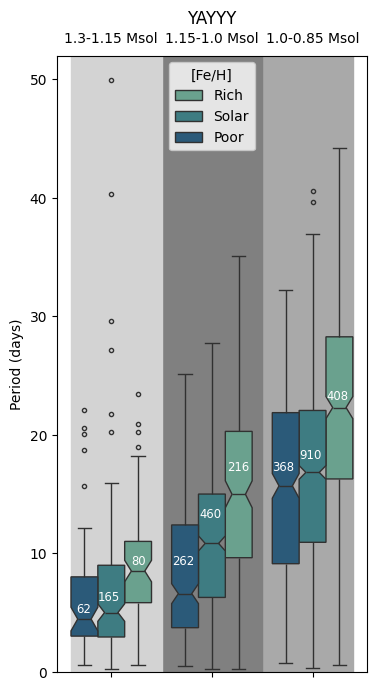

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('result.csv')[['GaiaDR2', 'Prot', '[Fe/H]', 'Mass']].dropna()

massbins = pd.cut(data['Mass'], (0.85, 1.0, 1.15, 1.3), include_lowest=True).dropna()
massbins = pd.Series.dropna(massbins)
fehbins = pd.cut(data['[Fe/H]'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()

data = data.drop(['[Fe/H]', 'Mass'], axis=1)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)
data = data.merge(massbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['Mass', '[Fe/H]']).size().reset_index(name='counts')

plt.figure(figsize=(4,8))
ax = sns.boxplot(data=data, x='Mass', y='Prot', orient='v', hue='[Fe/H]', hue_order=('Rich', 'Solar', 'Poor'), palette='crest', fliersize=3, notch=True)

# plot info
ax.set_title('YAYYY')
ax.set_ylabel('Period (days)')
ax.set_xlabel('')
ax.set_ylim(0, 52)
ax.set_xticklabels(('1.0-0.85 Msol', '1.15-1.0 Msol', '1.3-1.15 Msol'))
ax.invert_xaxis()
ax.tick_params(axis='x', labeltop=True, labelbottom=False)
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# number of observations per box
ax.text(-0.14, 23, '408', size='small', color='w')
ax.text(0.13, 18, '910', size='small', color='w')
ax.text(0.4, 17, '368', size='small', color='w')
ax.text(0.85, 17, '216', size='small', color='w')
ax.text(1.12, 13, '460', size='small', color='w')
ax.text(1.4, 9, '262', size='small', color='w')
ax.text(1.8, 9, '80', size='small', color='w')
ax.text(2.14, 6, '165', size='small', color='w')
ax.text(2.35, 5, '62', size='small', color='w')

plt.savefig('metallicity.png')
plt.show()


![priii](usagi.webp "yaha")

# Period against Temperature Subdivided by Metallicity

/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_5494/3255432560.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['BP-G', '[Fe/H]']).size().reset_index(name='counts')
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_5494/3255432560.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))


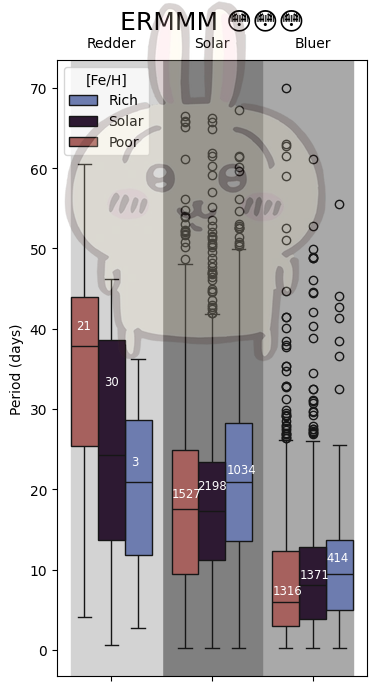

In [80]:
from PIL import Image

data = pd.read_csv('result.csv')[['GaiaDR2', 'Prot', 'BP-G', '[Fe/H]']].dropna()
fehbins = pd.cut(data['[Fe/H]'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()
colorbins = pd.cut(data['BP-G'], (-0.2, 0.35, 0.95, 1.5), include_lowest=True).dropna()

data = data.drop(['BP-G', '[Fe/H]'], axis=1)
data = data.merge(colorbins, how='inner', left_index=True, right_index=True)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['BP-G', '[Fe/H]']).size().reset_index(name='counts')

plt.figure(figsize=(4,8))
ax = sns.boxplot(data=data, x='BP-G', y='Prot', orient='v', hue='[Fe/H]', hue_order=('Rich', 'Solar', 'Poor'), palette='twilight')

# sets plot parameters
ax.set_title('ERMMM 😳😳😳', size=18)
ax.set_ylabel('Period (days)')
ax.set_xlabel('')
ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
ax.invert_xaxis()
ax.tick_params(axis='x', labeltop=True, labelbottom=False)
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# counts number of observations
ax.text(-0.14, 11, '414', size='small', color='w')
ax.text(0.13, 9, '1371', size='small', color='w')
ax.text(0.4, 7, '1316', size='small', color='w')
ax.text(0.85, 22, '1034', size='small', color='w')
ax.text(1.15, 20, '2198', size='small', color='w')
ax.text(1.4, 19, '1527', size='small', color='w')
ax.text(1.8, 23, '3', size='small', color='w')
ax.text(2.07, 33, '30', size='small', color='w')
ax.text(2.35, 40, '21', size='small', color='w')

im = Image.open('usagi.png')
plt.figimage(im, 0, 315, alpha=0.2)

plt.savefig('prot_vs_color.png')
plt.show()

![priii](usagi.webp "yaha")

# Cross Reference w/ Gaia DR3 Metallicity Data 

In [99]:
def read():
    '''
    Takes data from Armand et al. 2020 (Table 2; should be ~5.7 GB) and cross matches it with objects in result.csv
    to gauge accuracy of metallicity values in the latter
    '''

    df2 = pd.read_csv('table-2.csv')[['source_id', 'mh_xgboost']]
    df = pd.read_csv('result.csv')[['GaiaDR2', '[Fe/H]']].dropna()

    result = pd.merge(df2, df, left_on='source_id', right_on='GaiaDR2', how='inner')
    result = result.drop('GaiaDR2', axis=1)

    result.to_csv('metallicitycompare.txt', sep=' ')

    return result

read()

df = pd.read_csv('metallicitycompare.txt')
for i, row in df.itertuples():
    row = row.split()
    print(f'{(float(row[2]) / float(row[3]) - 1) * 100:.3f}%')


912.942%
-13.971%
0.469%
117.860%
-4.085%
-175.166%
126.204%
-3.671%
41.069%
53.709%
-302.811%
91.800%
147.886%
-59.487%
1998.765%
-8.978%
107.090%
18.058%
6.001%
-91.402%
425.541%
2.187%
-209.290%
-2528.183%
75.606%
-26.075%
230.839%
22.729%
-222.449%
-68.173%
-50.997%
15.235%
-60.365%
83.670%
-37.603%
-9.060%
55.621%
200.569%
-25.851%
141.455%
-446.487%
1.268%
-20.133%
97.314%
53.487%
557.711%
-122.189%
-22.802%
43.890%
-63.237%
109.916%
-90.034%
1275.752%
-52.703%
42.927%
714.976%
